In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

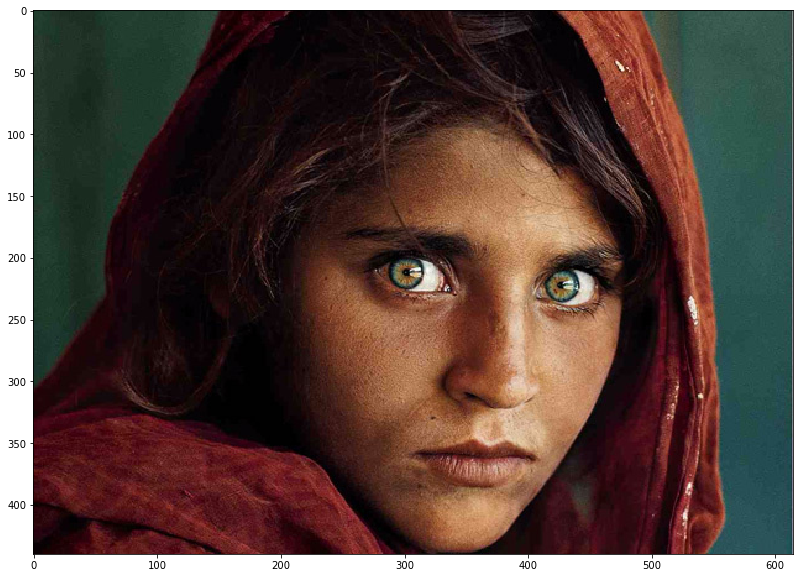

In [2]:
### load image
img = cv2.imread('images/afghan-girl.jpg')      # load image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # create a grayscale of the image and save it  as gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # convert image to RGB and save it


    
plt.figure(figsize=(20,10))       # change the figure size to 20 by 10
plt.imshow(img)   # display
plt.show() 

## load cascade
Create a variable with the location of the haarcascades file

In [3]:
faceCascadePath = 'haarcascades/haarcascade_frontalface_default.xml'

In [4]:
faceCascade = cv2.CascadeClassifier(faceCascadePath)

In [5]:
type(faceCascade)

cv2.CascadeClassifier

`faceCascade` is a CascadeClassifier

`detectMultiScale` is a mehod within CascadeClassifier
- its parameters are:
    - **scaleFactor**: How much the image size is reduced at each image scale. This value is used to create the scale pyramid in order to detect faces at multiple scales in the image (some faces may be closer to the fore-ground, and thus be larger; other faces may be smaller and in the background, thus the usage of varying scales). A value of 1.05 indicates that Jeremy is reducing the size of the image by 5% at each level in the pyramid.
    
    - **minNeighbors**: How many neighbors each window should have for the area in the window to be considered a face. The cascade classiﬁer will detect multiple windows around a face. This parameter controls how many rectangles (neighbors) needto be detected for the window to be labeled a face.
    
    - **minSize**: A tuple of width and height (in pixels) indicating the minimum size of the window. Bounding boxes smaller than this size are ignored. It is a good idea to start with (30, 30) and ﬁne-tune from there.


```python
faceRects = faceCascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors=5, minSize = (30,30))

for (x,y, w, h) in faceRects:
    cv2.rectangle(img, (x,y), (x+ w, y + h), (0,255,0), 2)
    
    
plt.figure(figsize=(20,10))       # change the figure size to 20 by 10
plt.imshow(img),plt.axis("off")   # display and remove  x&y axis
plt.show()                        # display image onto jupyter notebook cell

```

In [6]:
faceRects = faceCascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors=5, minSize = (30,30))

In [7]:
faceRects

array([[233, 108, 285, 285]], dtype=int32)

### face location
`faceRects` is a numpy array with 4 values:
- [[233, 108, 285, 285]]
- 233 is the x location
- 108 is the y location
- 285 is the w location
- 285 is the h location


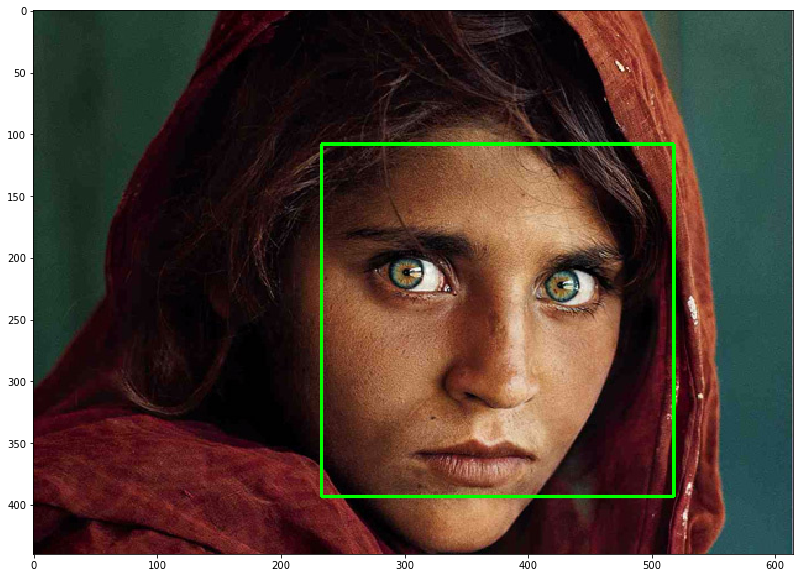

In [8]:
for (x,y, w, h) in faceRects:
    cv2.rectangle(img, (x,y), (x+ w, y + h), (0,255,0), 2)
   

plt.figure(figsize=(20,10))       # change the figure size to 20 by 10
plt.imshow(img)                   # display 
plt.show()                        # display image onto jupyter notebook cell